# **Analysis of Air Quality**
# using
# **Machine Learning**
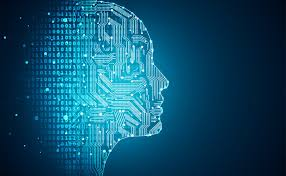

In [ ]:
%%html
<img src="https://specials-images.forbesimg.com/imageserve/5ea702ea165a170006a5d957/960x0.jpg?fit=scale">

Import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
import folium

In [ ]:
from geopy.geocoders import Nominatim

Import the data from local device to the notebook.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [ ]:
import io
city_df=pd.read_csv(io.StringIO(uploaded['city_day.csv'].decode('utf-8')))

In [ ]:
# Display the top 5 rows of the dataframe
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Get the dimensions of the dataframe
print("The number of rows and columns in the dataframe = ",city_df.shape)

The number of rows and columns in the dataframe =  (29531, 16)


In [ ]:
missing_df = (city_df.isnull().sum()).to_frame()          # Calculate the number of missing values in each column
missing_df.reset_index(inplace=True)                      # Reset index
missing_df.columns=['col_name','missing_val']             # Rename the columns
missing_df.sort_values(by = 'missing_val', inplace=True)  # Sort in ascending order
missing_df                                                # Displays the missing values dataframe

,col_name,missing_val
0,City,0
1,Date,0
8,CO,2059
4,NO,3582
5,NO2,3585
9,SO2,3854
10,O3,4022
6,NOx,4185
2,PM2.5,4598
14,AQI,4681


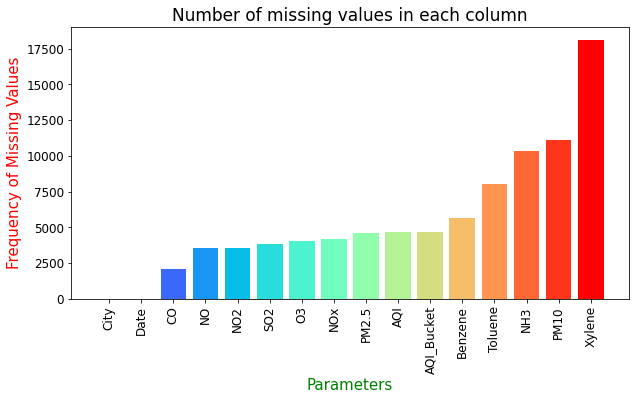

In [ ]:
# Visualizing the frequency of missing values
colors = cm.rainbow(np.linspace(0, 1, len(missing_df['col_name']))) # Get a range of colors
plt.figure(figsize=(10,5)) # Set the figure size
plt.bar(missing_df['col_name'],missing_df['missing_val'], color=colors) # Plot the bar graph
plt.title('Number of missing values in each column', size=17) # Set the title
# Configuring the axes
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Parameters',color='green',size=15)
plt.ylabel('Frequency of Missing Values',color='red',size=15)
plt.show()

In [ ]:
# Get the basic information about each column in the city_df dataframe
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing values in descending order
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_df)
missing_values.style.background_gradient(cmap='Blues')  #,axis = 0)

The dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


In [ ]:
cities = city_df['City'].value_counts()   # Count the number of observations for each city
print(f'Total number of cities in the dataset : {len(cities)}')  # Count the total number of cities in the dataframe
print(cities)

Total number of cities in the dataset : 26
Lucknow               2009
Ahmedabad             2009
Mumbai                2009
Delhi                 2009
Bengaluru             2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: City, dtype: int64


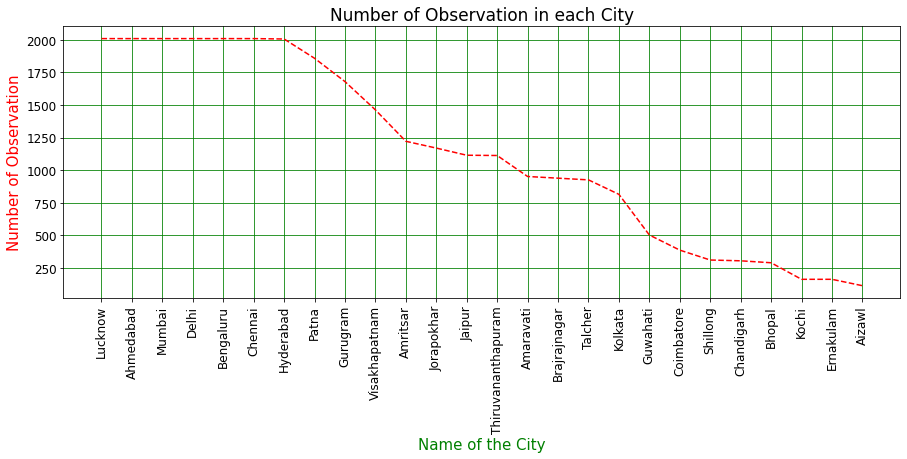

In [ ]:
# Visualize the number of observations for each city
plt.figure(figsize=(15,5))    # Set the figure size
plt.plot(cities, 'r--') # Plot a line graph for the number of observations in each city
plt.title("Number of Observation in each City", size=17)
# Configure the axes
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Name of the City',color='green',size=15)
plt.ylabel('Number of Observation',color='red',size=15)
plt.grid(True, c='green')

In [ ]:
# Convert string to datetime64
city_df['Date'] = pd.to_datetime(city_df['Date'])

In [ ]:
# Range of availability of data
print(f"The available data is between {city_df['Date'].min()} and {city_df['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [ ]:
# Create a new column combining few existing ones and drop the older ones
city_df['BTX'] = city_df['Benzene']+city_df['Toluene']+city_df['Xylene']
city_df.drop(['Benzene','Toluene','Xylene'],axis=1, inplace=True)

In [ ]:
# Create a new column combining few existing ones
city_df['Particulate_Matter'] = city_df['PM2.5']+city_df['PM10']

In [ ]:
city_df.columns  # A glimpse at the columns in the dataframe

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'AQI', 'AQI_Bucket', 'BTX', 'Particulate_Matter'],
      dtype='object')

In [ ]:
pollutants = ['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'BTX','Particulate_Matter']   # Make a list of pollutants

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



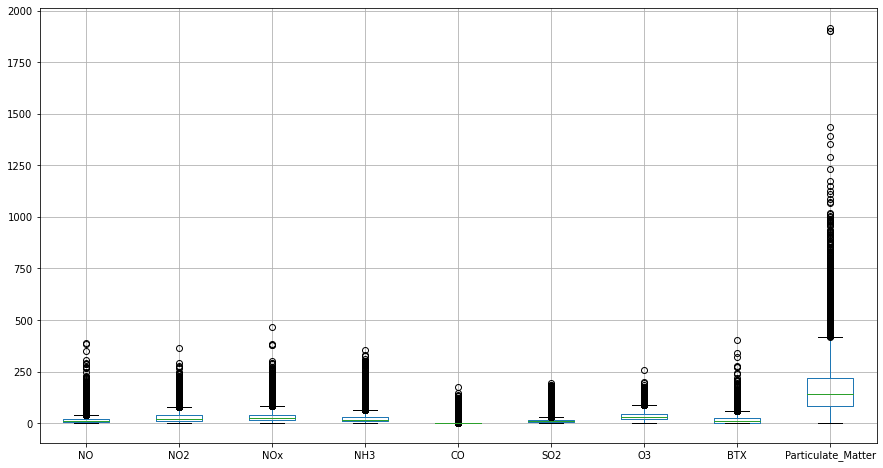

In [ ]:
boxplot = city_df.boxplot(column=[pollutant for pollutant in pollutants], figsize=(15,8))  # Create a boxplot to understand data distribution

In [ ]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,3), dpi= 150)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :], color='#F08080')

    # Configure the title and the axes
    axes[0].set_xlabel('Year', fontsize=14, color = '#ff8000') #'#aa00ff')
    axes[1].set_xlabel('Month', fontsize = 14, color = '#ff8000')  #aa00ff')  
    axes[0].set_ylabel(value, color = '#ff0066')
    axes[1].set_ylabel(value, color = '#ff0066')
    axes[0].set_title('Year-wise Box Plot \n(The Trend) ', fontsize=14, color='#8600b3')   #'#00bfff')
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=14, color='#8600b3')  #'#00bfff')
    plt.show()

In [ ]:
city_df.reset_index(inplace=True)
df = city_df.copy()

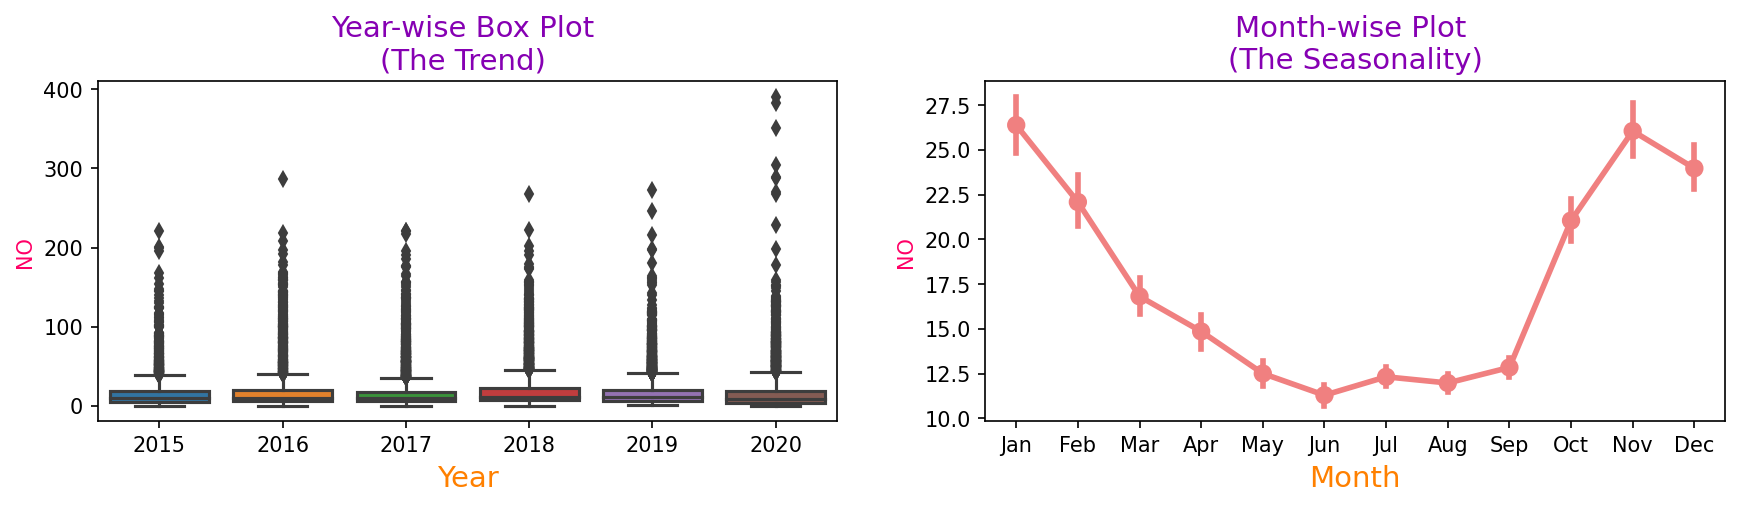

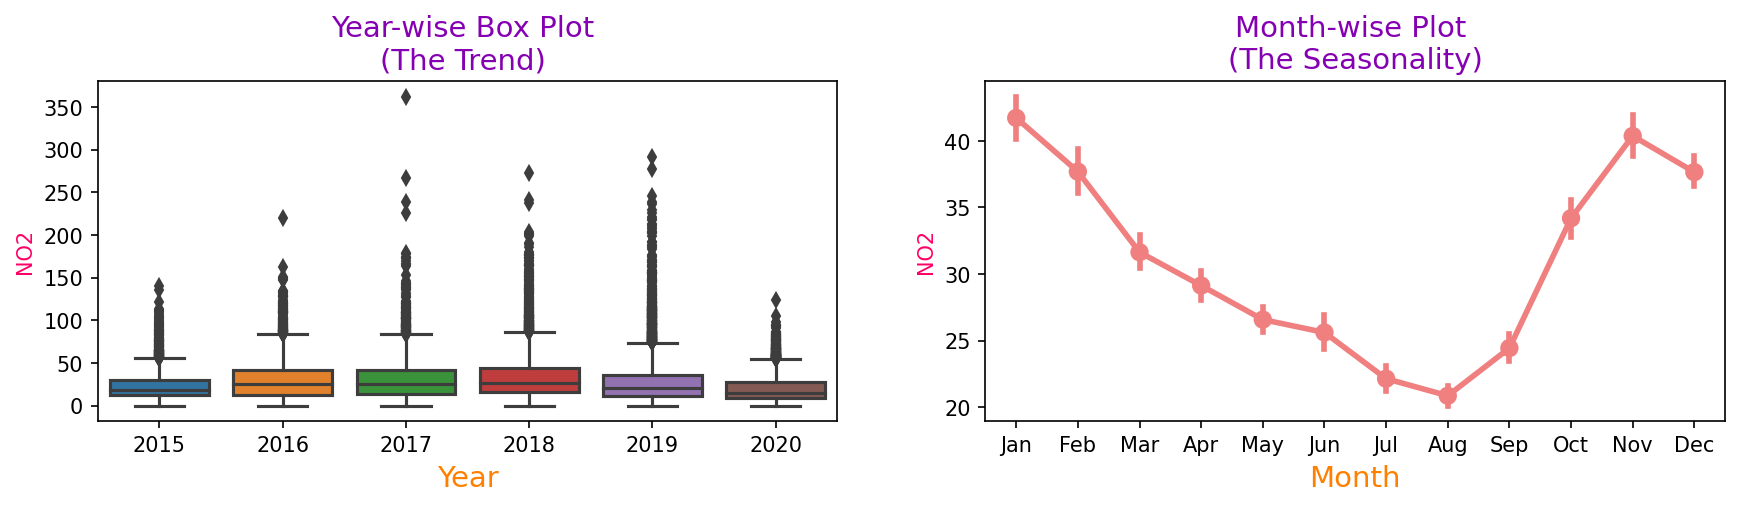

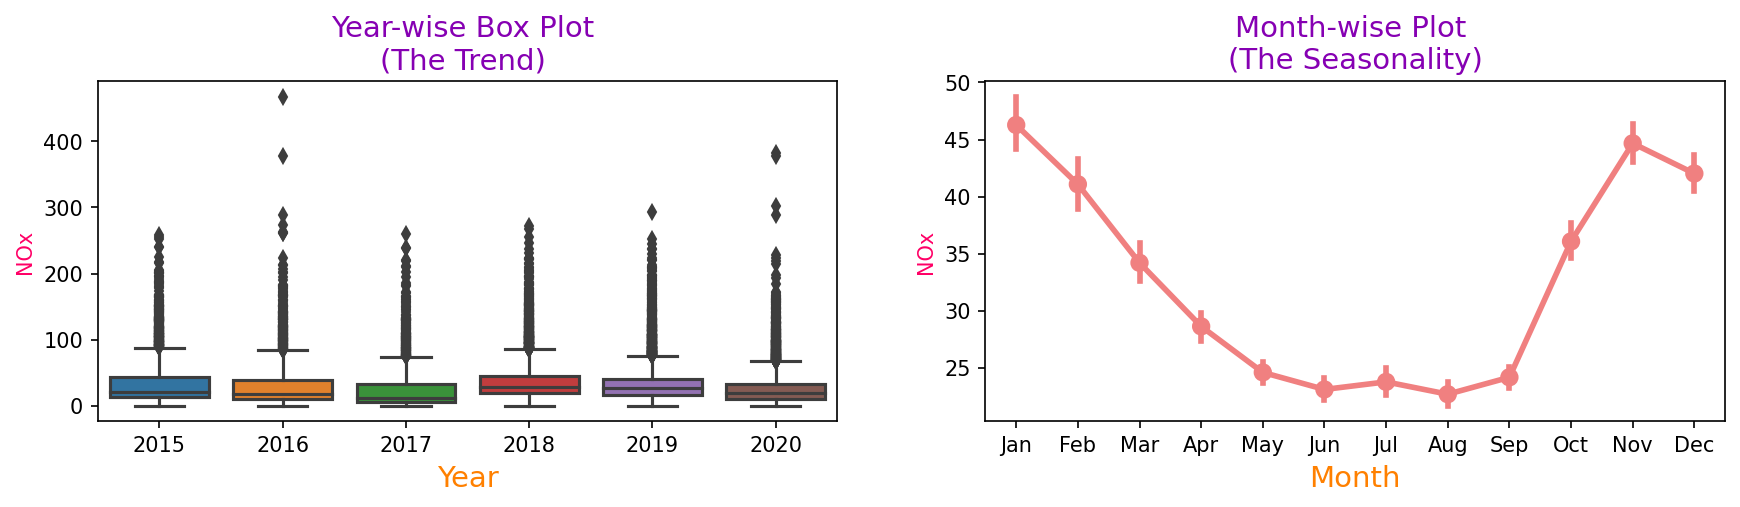

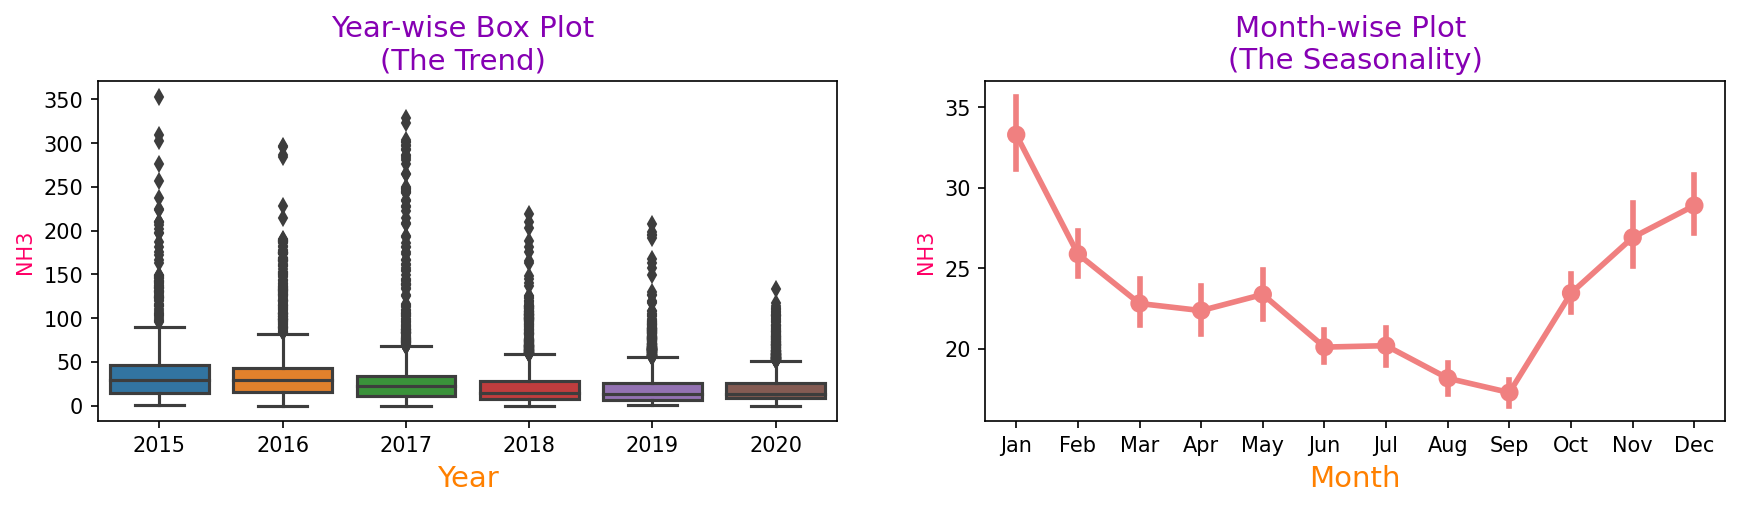

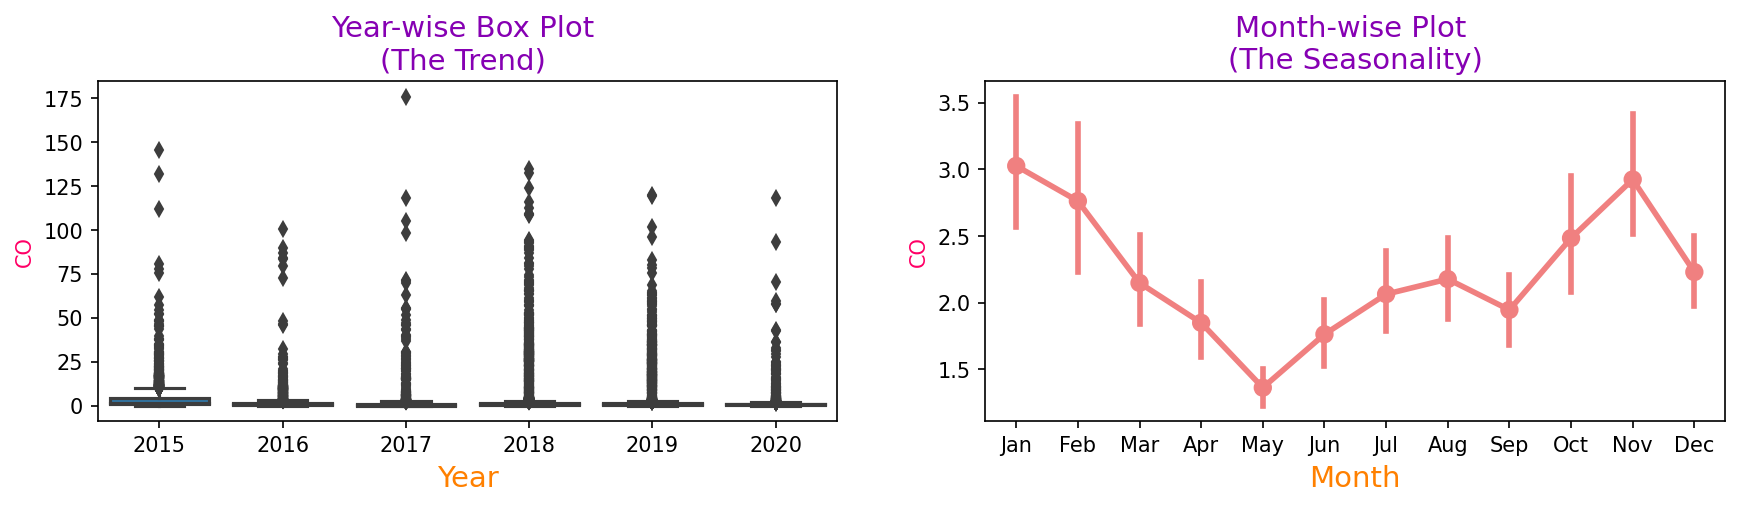

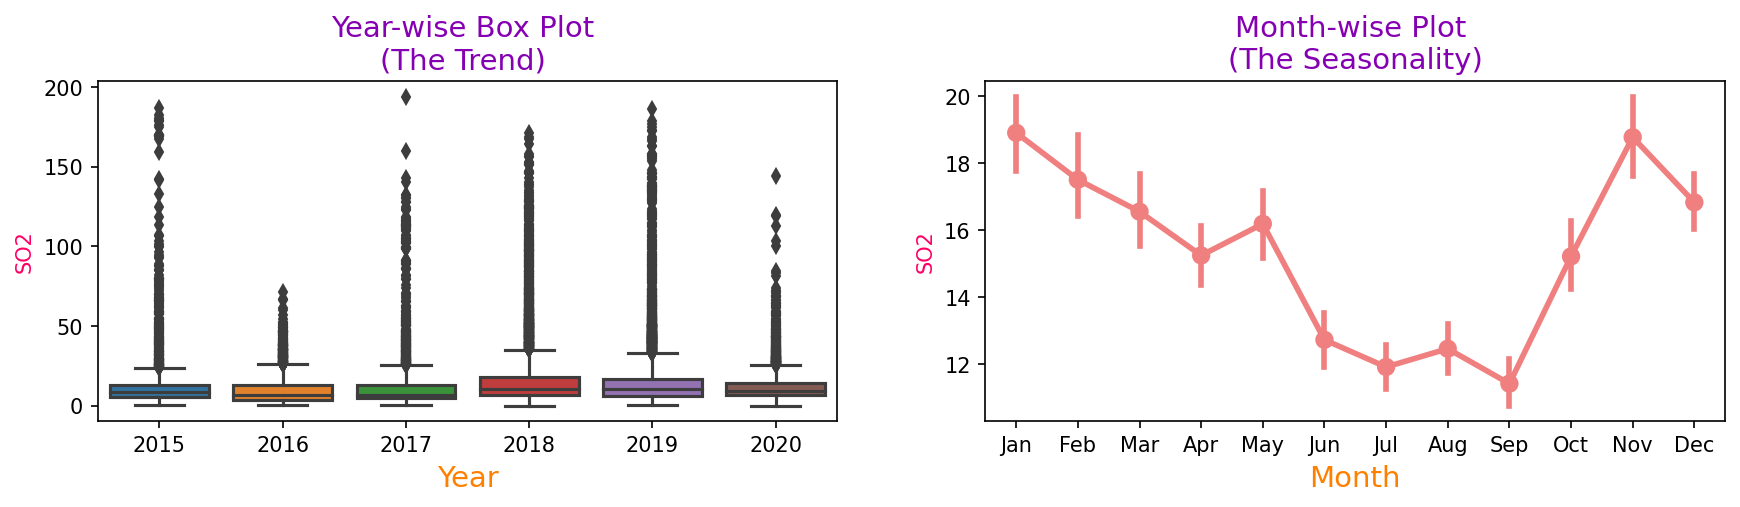

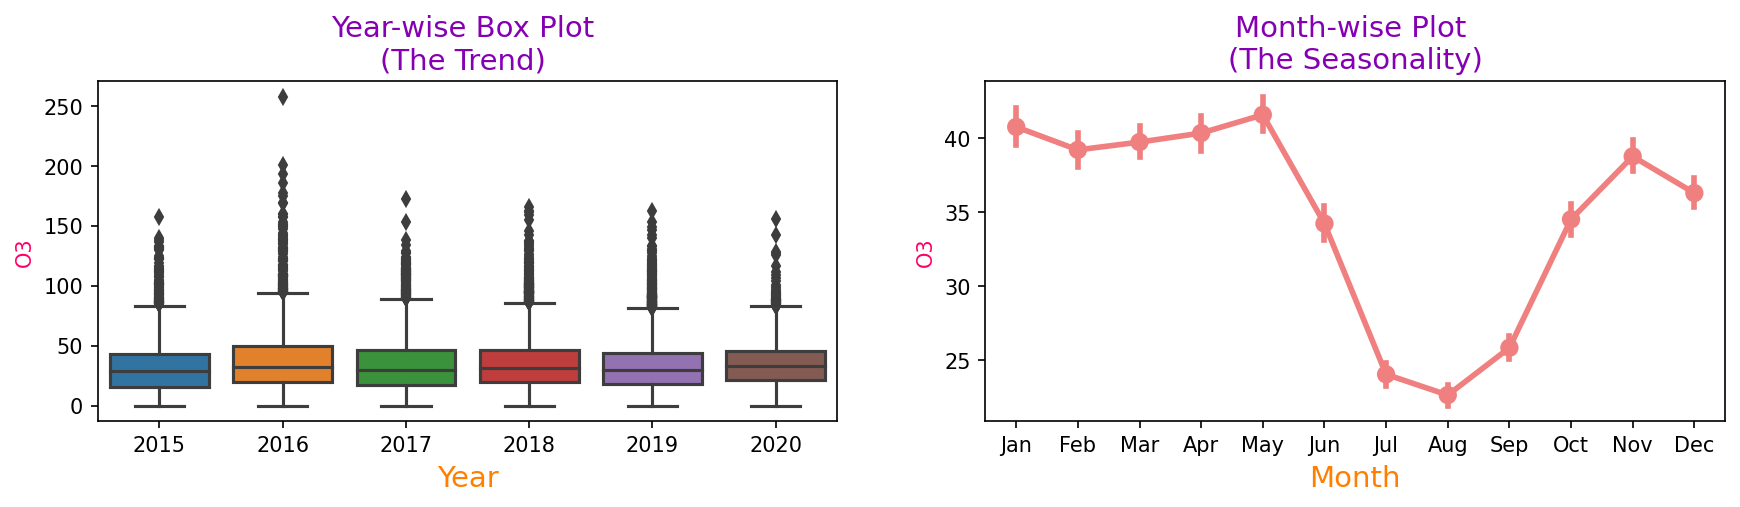

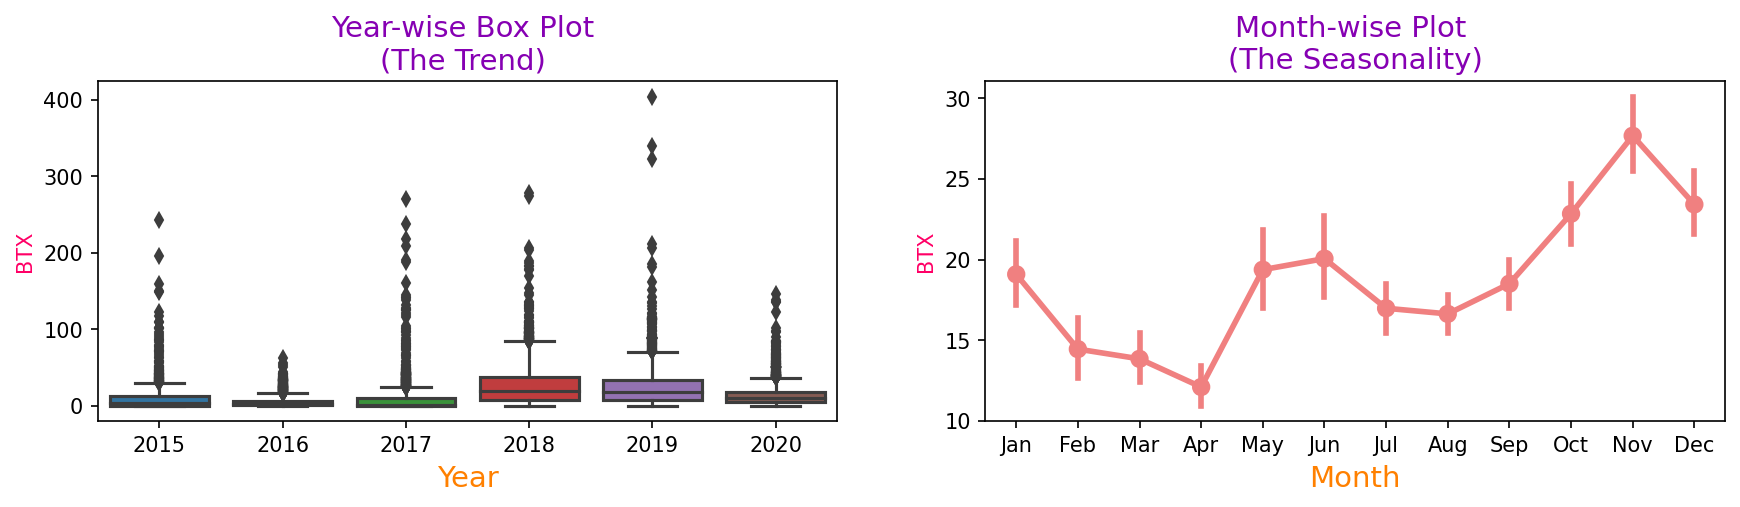

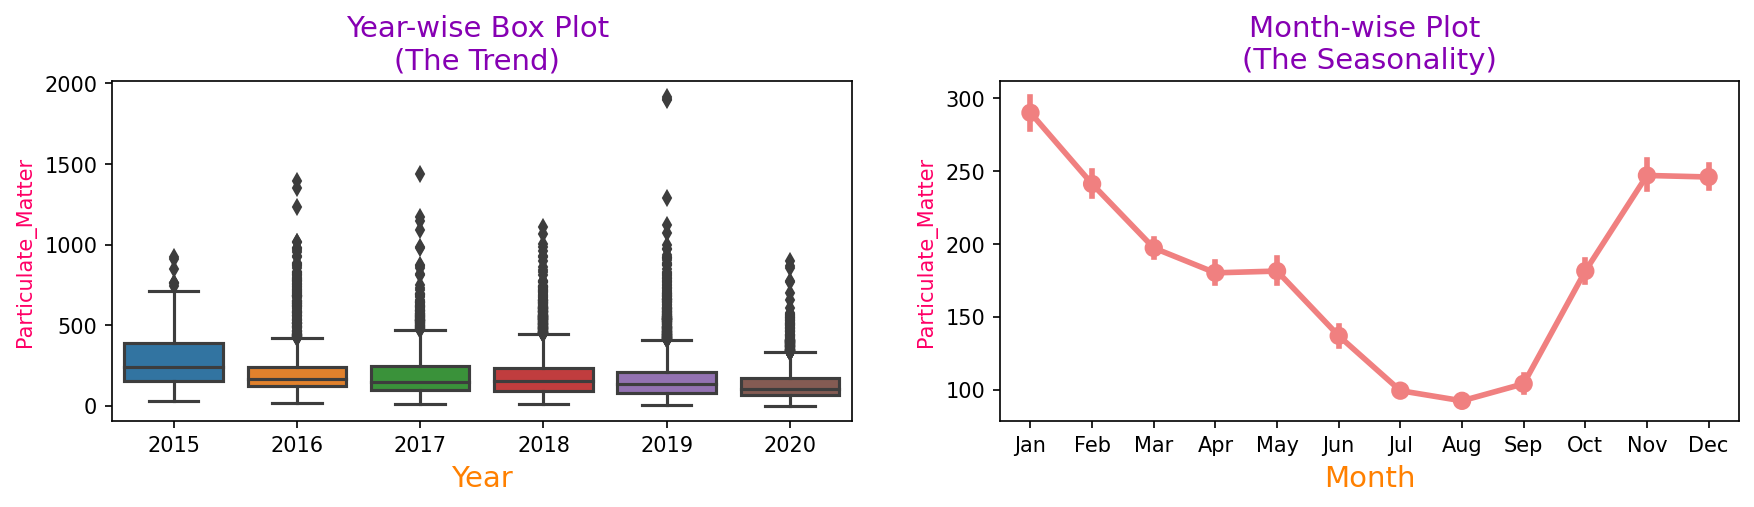

In [ ]:
for i in pollutants:
  trend_plot(df,i)

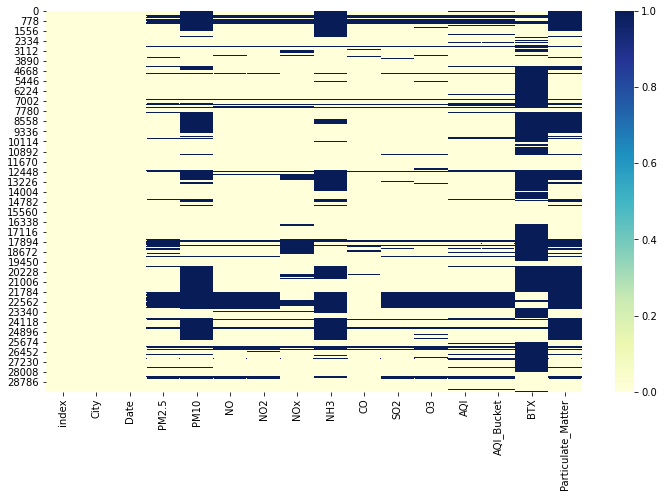

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(city_df.isnull(), cmap="YlGnBu")

In [ ]:
def max_polluted_city(pollutant):
    x1 = city_df[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    print(x1[:10].style.background_gradient(cmap='OrRd'))
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
pm = max_polluted_city('Particulate_Matter')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm,no2,so2,co,btx)

,City,Particulate_Matter
0,Delhi,352.480000
1,Gurugram,289.980000
2,Talcher,233.790000
3,Jorapokhar,198.450000
4,Patna,192.580000
5,Brajrajnagar,189.680000
6,Kolkata,179.990000
7,Guwahati,179.890000
8,Jaipur,178.000000
9,Amritsar,173.950000


In [ ]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']   # List of major Indian cities
filtered_city_df = city_df[city_df['Date'] >= '2019-01-01']  # Filter data after 1.1.2019
AQI = filtered_city_df[filtered_city_df.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe


In [ ]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

In [ ]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']  # AQI levels before lockdown
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']  # AQI levels after lockdown

In [ ]:
print(AQI_beforeLockdown.mean())  # Mean AQI for cities before lockdown
print(AQI_afterLockdown.mean())   # Mean AQI for cities after lockdown

City
Ahmedabad    383.776471
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64
City
Ahmedabad    127.810811
Bengaluru     68.486486
Chennai       62.351351
Delhi        107.270270
Hyderabad     65.567568
Mumbai        73.891892
dtype: float64


In [ ]:
filtered_city_day = city_df[city_df['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

In [ ]:
start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_df['Date'] >= start_date1) & (city_df['Date']  <= end_date1)
pollutants_filtered_2019 = city_df.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_df['Date'] >= start_date2) & (city_df['Date']  <= end_date2)
pollutants_filtered_2020 = city_df.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

In [ ]:
# Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020

def pollution_comparison(city):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

In [ ]:
pollution_comparison('Ahmedabad')

In [ ]:
city_df.head()

,index,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter
0,0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN,0.02,NaN
1,1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN,12.95,NaN
2,2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN,25.45,NaN
3,3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN,15.57,NaN
4,4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN,28.68,NaN


In [ ]:
city = city_df.dropna()   # Drop any NaN values

In [ ]:
X = city[['O3','PM2.5','PM10','CO','SO2','NO2']]  # Independent Columns
y = city['AQI']   # Dependent Column

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)  # Employs train-test split

**Multiple Linear Regression**

In [ ]:
regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)  # Fit the model
print(regr.coef_)

[ 0.32547044  0.81590659  0.450496    7.75165513 -0.03536902  0.06013521]


In [ ]:
pred = regr.predict(X_test)  # Predict AQI from the model

In [ ]:
print('r2_score:',r2_score(y_test,pred))

r2_score: 0.9141849195224875


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
for i in range(2,5):
    poly = PolynomialFeatures(degree = i) 
    X_poly = poly.fit_transform(X_train) 

    poly.fit(X_poly, y_train) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y_train) 
    res = lin2.predict(poly.fit_transform(X_test))
    print('degree = ',i,'r2_score:',r2_score(y_test,res))

degree =  2 r2_score: 0.9286929116095247
degree =  3 r2_score: 0.9315078341597047
degree =  4 r2_score: 0.7136294513806061


In [ ]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X_train) 

poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
res = lin2.predict(poly.fit_transform(X_test))
print('degree = ',i,'r2_score:',r2_score(y_test,res))

degree =  4 r2_score: 0.9315078341597047


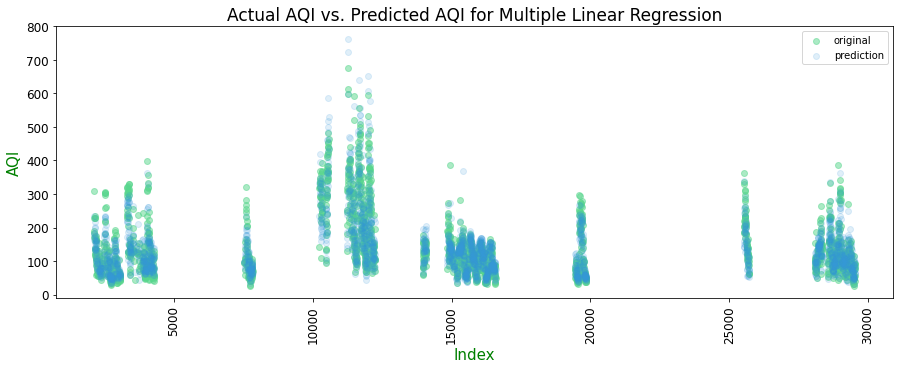

In [ ]:
# Visualize the number of observations for each city
plt.figure(figsize=(15,5))    # Set the figure size
# Scatter plot for original values
plt.scatter(X_test.index,y_test, alpha=0.5, c='#58D68D', label='original')
# Scatter plot for predicted values
plt.scatter(X_test.index,pred, alpha=0.15, c='#3498DB', label='prediction')
plt.title('Actual AQI vs. Predicted AQI for Multiple Linear Regression', size=17)
# Configure the axes
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Index',color='green',size=15)
plt.ylabel('AQI',color='green',size=15)
plt.legend(loc='upper right', borderaxespad=0.5)
plt.show()

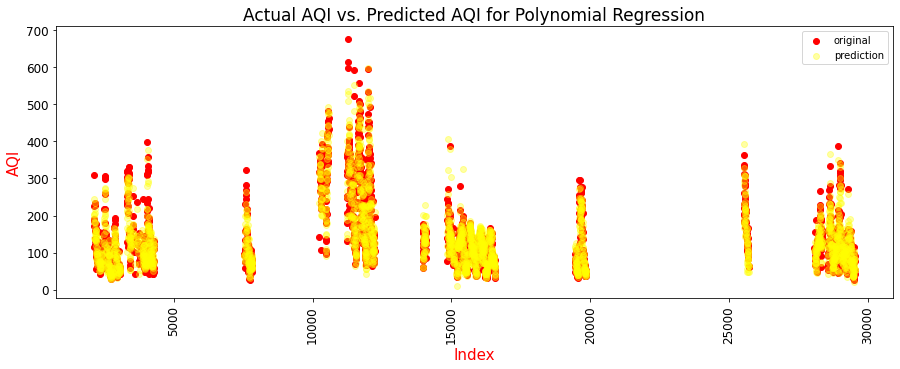

In [ ]:
# Visualize the number of observations for each city
plt.figure(figsize=(15,5))    # Set the figure size
# Scatter plot for original values
plt.scatter(X_test.index,y_test, c='red', label='original')
# Scatter plot for predicted values
plt.scatter(X_test.index, res , alpha=0.35, c='yellow', label='prediction')
plt.title('Actual AQI vs. Predicted AQI for Polynomial Regression', size=17)
# Configure the axes
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Index',color='red',size=15)
plt.ylabel('AQI',color='red',size=15)
plt.legend(loc='upper right', borderaxespad=0.5)
plt.show()

## Visualization of the severity of AQI Index on the map of India

In [ ]:
mean_severe_AQI = city_df.groupby(['City']).mean()  # Calculate mean AQI for each City

In [ ]:
mean_severe_AQI.head()  # Display the top 5 rows

,index,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,BTX,Particulate_Matter
City,,,,,,,,,,,,,
Ahmedabad,1004.0,67.854497,114.584029,22.428021,59.025496,47.366898,NaN,22.193407,55.253733,39.155408,452.122939,37.105207,162.407463
Aizawl,2065.0,17.130000,23.352857,9.408053,0.388496,12.610354,22.308938,0.283628,7.378053,3.707692,34.765766,NaN,40.942273
Amaravati,2597.0,37.773217,76.362020,4.436071,22.175748,15.380413,11.988493,0.627904,14.258341,38.115100,95.299643,3.681789,114.328352
Amritsar,3683.0,55.468335,115.202599,18.727926,18.522116,35.648294,14.375556,0.551301,8.148917,22.416148,119.920959,14.576607,173.953091
Bengaluru,5298.0,35.819828,83.243287,9.409136,27.995042,19.717092,21.977176,1.838634,5.519021,32.868086,94.318325,NaN,121.017517


In [ ]:
cols = mean_severe_AQI.columns.to_list()  # List of Columns in the dataframe
cols

['index',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'AQI',
 'BTX',
 'Particulate_Matter']

In [ ]:
cols.remove('AQI')  # Removing the AQI column from the dataframe

In [ ]:
mean_severe_AQI.drop(columns=cols, inplace=True)  # Remove the unnecessary columns

In [ ]:
# Categorical Classification on the basis of AQI
def label_AQI (row):
   if row['AQI'] < 50:
      return 'Good'
   elif row['AQI']<100 :
      return 'Moderate'
   elif row['AQI']<150:
      return 'Unhealthy for Sensitive Groups'
   elif row['AQI']<200:
     return 'Unhealthy'
   elif row['AQI']<300:
     return 'Very Unhealthy'
   else:
     return 'Hazardous'

In [ ]:
mean_severe_AQI['Avg_AQI_Index'] = mean_severe_AQI.apply (lambda row: label_AQI(row), axis=1)  # Lambda function to add the categorical AQI row

In [ ]:
# Function to add colors based on the Average AQI Index
def color(row):
   if row['Avg_AQI_Index'] =='Good':
      return 'green'
   elif row['Avg_AQI_Index']=='Moderate' :
      return 'beige'
   elif row['Avg_AQI_Index']=='Unhealthy for Sensitive Groups':
      return 'orange'
   elif row['Avg_AQI_Index']=='Unhealthy':
     return 'red'
   elif row['Avg_AQI_Index']=='Very Unhealthy':
     return 'purple'
   else:
     return 'darkred'

In [ ]:
mean_severe_AQI['AQI_Color'] = mean_severe_AQI.apply (lambda row: color(row), axis=1)  # Lambda function to add the column for color

In [ ]:
mean_severe_AQI.head()

,AQI,Avg_AQI_Index,AQI_Color
City,,,
Ahmedabad,452.122939,Hazardous,darkred
Aizawl,34.765766,Good,green
Amaravati,95.299643,Moderate,beige
Amritsar,119.920959,Unhealthy for Sensitive Groups,orange
Bengaluru,94.318325,Moderate,beige


In [ ]:
geolocator = Nominatim(user_agent="my-application")

In [ ]:
mean_severe_AQI.reset_index(level=0, inplace=True)  # Extract city to a column
mean_severe_AQI.head()

,City,AQI,Avg_AQI_Index,AQI_Color
0,Ahmedabad,452.122939,Hazardous,darkred
1,Aizawl,34.765766,Good,green
2,Amaravati,95.299643,Moderate,beige
3,Amritsar,119.920959,Unhealthy for Sensitive Groups,orange
4,Bengaluru,94.318325,Moderate,beige


In [ ]:
# Get the geographical details of each city
for i in mean_severe_AQI['City']:
  print(i," ",geolocator.geocode(i))

Ahmedabad   Ahmedabad, Ahmadabad City Taluka, Ahmedabad District, Gujarat, 380001, India
Aizawl   Aizawl, Tlangnuam, Aizwal, Mizoram, 796190, India
Amaravati   Amaravati, Kalidindi, Krishna, Andhra Pradesh, 521344, India
Amritsar   Amritsar, Amritsar I Tahsil, Amritsar, Punjab, 143001, India
Bengaluru   Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
Bhopal   Bhopal, Madhya Pradesh, 462001, India
Brajrajnagar   None
Chandigarh   Chandigarh, 160018, India
Chennai   Chennai, Chennai District, Tamil Nadu, India
Coimbatore   Coimbatore, Coimbatore North, Coimbatore District, Tamil Nadu, 641001, India
Delhi   Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India
Ernakulam   Ernakulam Bus Station, Ammankovil Road, Shenoys, Kanayannur, Ernakulam district, Kerala, 682011, India
Gurugram   Gurugram, Haryana, India
Guwahati   Guwahati, Kamrup Metropolitan, 781015, India
Hyderabad   Hyderabad, Telangana, India
Jaipur   Jaipur, Jaipur Municipal Corporation, Jaipur Tehsil, Jaipur

Since the details of Brajrajnagar are not available, it is a good idea to drop its row

In [ ]:
mean_severe_AQI = mean_severe_AQI[mean_severe_AQI.City!='Brajrajnagar']

In [ ]:
latitude = []
longitude = []

In [ ]:
latitude = [geolocator.geocode(i).latitude for i in mean_severe_AQI['City']]  # Get the latitudes of each city
longitude = [geolocator.geocode(i).longitude for i in mean_severe_AQI['City']]  # Get the longitudes of each city

In [ ]:
India_map =folium.Map(location=[20.5937, 78.9629 ],zoom_start=5, tiles='OpenStreetMap')  # Plot the map of India

In [ ]:
# Add the columns of latitude and longitude
mean_severe_AQI['latitude']=np.array(latitude)
mean_severe_AQI['longitude']=np.array(longitude)

In [ ]:
mean_severe_AQI.head()

,City,AQI,Avg_AQI_Index,AQI_Color,latitude,longitude
0,Ahmedabad,452.122939,Hazardous,darkred,23.021624,72.579707
1,Aizawl,34.765766,Good,green,23.743524,92.738291
2,Amaravati,95.299643,Moderate,beige,16.499853,81.330081
3,Amritsar,119.920959,Unhealthy for Sensitive Groups,orange,31.634308,74.873679
4,Bengaluru,94.318325,Moderate,beige,12.979120,77.591300


In [ ]:
# Loop through each city and add each to the map
for lat, lng, label1, label2, col in zip(mean_severe_AQI.latitude, mean_severe_AQI.longitude, mean_severe_AQI.City, mean_severe_AQI.Avg_AQI_Index, mean_severe_AQI.AQI_Color):
    label = '{}, {}'.format(label1,label2)  # Modify the label
    folium.Marker(
        [lat, lng],
        popup=label,
        icon=folium.Icon(color=col)
    ).add_to(India_map)

# Show map
India_map

# Hope that the project is worthy enough to help improve the air quality. Thank you!